<a href="https://colab.research.google.com/github/YOOKJIN/ML-DL-Study/blob/main/Part8_ANN_for_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

08-1 합성곱 신경망의 구성 요소

In [1]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

In [2]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

08-2 합성곱 신경망을 사용한 이미지 분류

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

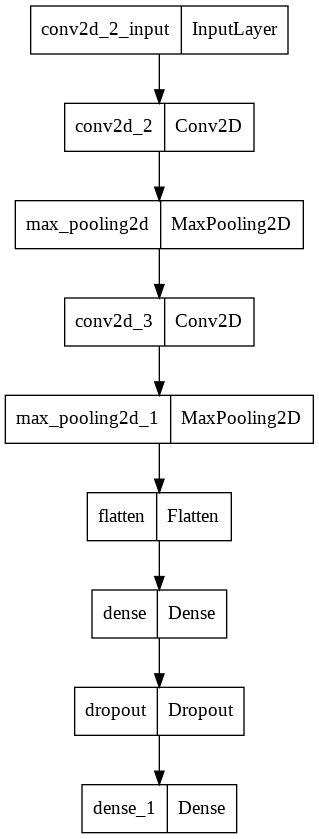

In [9]:
keras.utils.plot_model(model)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 8ms/step - loss: 0.5164 - accuracy: 0.8148 - val_loss: 0.3213 - val_accuracy: 0.8807
Epoch 2/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3417 - accuracy: 0.8763 - val_loss: 0.2744 - val_accuracy: 0.8970
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2875 - accuracy: 0.8950 - val_loss: 0.2596 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2590 - accuracy: 0.9046 - val_loss: 0.2316 - val_accuracy: 0.9111
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2326 - accuracy: 0.9151 - val_loss: 0.2284 - val_accuracy: 0.9149
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2150 - accuracy: 0.9202 - val_loss: 0.2205 - val_accuracy: 0.9172
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1967 - accuracy: 0.9272 - val_loss: 0.2317 - val_a

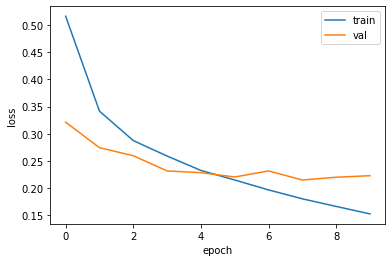

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2149 - accuracy: 0.9232


[0.21493592858314514, 0.9231666922569275]

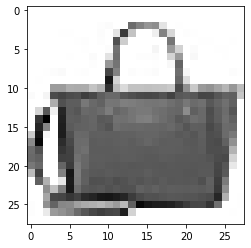

In [13]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[5.8037681e-14 3.6205869e-23 1.1895678e-18 1.3994111e-16 3.3349056e-16
  1.9415655e-14 8.7161347e-16 1.1765542e-15 1.0000000e+00 1.3513717e-16]]


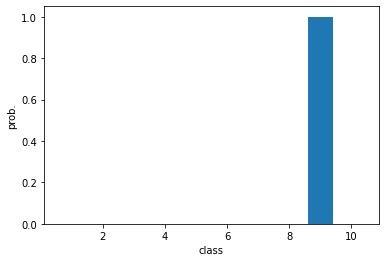

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
# 테스트 세트로 합성곱 신경망의 일반화 성능을 가늠.

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [17]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2421 - accuracy: 0.9185


[0.242118701338768, 0.9185000061988831]

08-3 합성곱 신경망의 최적화

In [18]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [19]:
model.layers

In [20]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [21]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.03045839 0.28626305


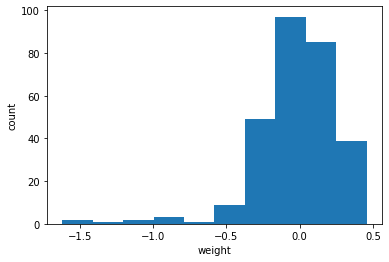

In [22]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

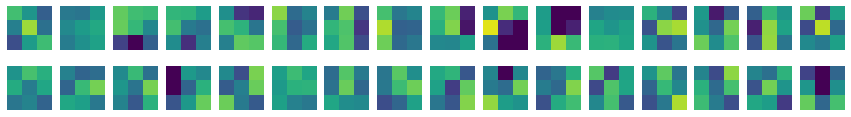

In [23]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [24]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [25]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [26]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0024356549 0.08055148


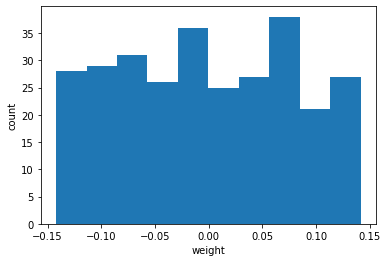

In [27]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

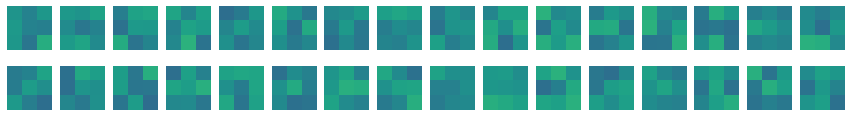

In [28]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()